# SOK-1006 Mikro
## Seminar 5
### Oppgave 3

In [33]:
import sympy as sp

Profittfunksjonen til bedriften $\pi=pN^{.5}K^{.25}-wN-rK-F$

In [37]:
N, K, w, r, F, p = sp.symbols('N K w r F p')

In [38]:
def profitt(N, K, w, r, F, p):
    return p*N**.5*K**.25-w*N-r*K-F
profitt(N, K, w, r, F, p)

-F + K**0.25*N**0.5*p - K*r - N*w

Finn førsteordensbetingelser

In [39]:
d_pi_N=sp.diff(profitt(N, K, w, r, F, p),N)
d_pi_K=sp.diff(profitt(N, K, w, r, F, p),K)
display(d_pi_N)
display(d_pi_K)

0.5*K**0.25*p/N**0.5 - w

0.25*N**0.5*p/K**0.75 - r

In [40]:
d_pi_N.args

(-w, 0.5*K**0.25*p/N**0.5)

In [41]:
display(d_pi_N.args[1]/d_pi_K.args[1])
display(d_pi_N.args[0]/d_pi_K.args[0])

2.0*K**1.0/N**1.0

w/r

Da vil en optimal løsning sette $\frac{2K}{N}=\frac{w}{r}$ dvs $N=\frac{2Kr}{w}$.

In [42]:
K_sol=sp.solve(d_pi_N.subs(N,(2*K*r)/(w)),K)[0]
K_sol

0.015625*p**4/(r**2*w**2)

In [43]:
N_rel=(2*r*K)/w
N_sol=N_rel.subs(K,K_sol)
N_sol


0.0312500000000001*p**4/(r*w**3)

In [44]:
def K_LR(p,r,w):
    return (0.015625*p**4)/(r**2*w**2)
K_LR(p,r,w)

0.015625*p**4/(r**2*w**2)

In [45]:
def N_LR(p,r,w):
    return (0.03125*p**4)/(r*w**3)
N_LR(p,r,w)

0.03125*p**4/(r*w**3)

Disse funksjonene forteller om etterspørsel etter kapital og arbeidskraft. For å finne verdiene for bedriften lokalisert i Tromsø setter vi inn p=1000, w= 380, r=500:

In [46]:
K_LR_TOS=K_LR(1000,500,380)
N_LR_TOS=N_LR(1000,500,380)
display(K_LR_TOS)
display(N_LR_TOS)

0.4328254847645429

1.1390144335909025

Profitten ved lokalisering i Tromsø blir da:

In [47]:
profitt_TOS=profitt(N_LR_TOS, K_LR_TOS, 380, 500, 200, 1000)
profitt_TOS

16.41274238227146

### deloppgave b

Lønn inkl arbeidsgiveravgift er 380 kr i Tromsø, dvs $w+7.9\%w=380$. Da er lønna i utgangspunktet (uten arbeidsgiveravgift) $w=380/1.079=352.18kr$. Det er dette bedriften må betale arbeidere dersom den flytter til Alta.

In [48]:
K_LR_ALTA=K_LR(1000,500,352.18)
N_LR_ALTA=N_LR(1000,500,352.18)
display(K_LR_ALTA)
display(N_LR_ALTA)

0.5039072874317256

1.4308231229249977

Vi ser at både kapital og arbeidskraft øker som følger av at lønna faller. Det er to effekter her: i) arbeidskraft har blitt relativt billigere og dermed øker etterspørsel etter den faktoren (bedriften substituerer bort fra faktoren som er blitt relativt dyrere), ii) for en gitt utgift kan bedriften nå kjøpe inn mer av begge faktorene ettersom prisen på arbeidskraft har falt (likner på inntektseffekten i konsumteori). Dette øker også etterspørselen etter kapital.

### deloppgave c)

In [60]:
# Gevinst ved flytting
profitt(N_LR_ALTA, K_LR_ALTA, 352.18, 500, 200, 1000)-profitt_TOS

35.540901333591194

### deloppgave d)
Hvor mye som bør produseres til enhver pris på lang sikt? Vi er ute etter å finne bedriftens tilbudskurve. Vi kan finne dette ved å sette optimale mengder (N_LR og K_LR) inn i produktfunksjonen $x=N^{0.5}K^{0.25}$, gitt at profitten er positiv.

In [62]:
min_p_TOS=sp.solve(profitt(N_LR_TOS, K_LR_TOS, 380, 500, 200, p))
min_p_TOS

[981.039999999999]

In [63]:
min_p_ALTA=sp.solve(profitt(N_LR_ALTA, K_LR_ALTA, 352.18, 500, 200, p))
min_p_ALTA

[948.449203840002]

Da vil bedriften tjene positiv profitt ved lokalisering i Tromsø dersom p>981.04, og ved lokalisering i Alta for p>948.45.

In [56]:
def tilbud(p,r,w):
    return (N_LR(p,r,w))**(0.5)*(K_LR(p,r,w))**(0.25)
tilbud (p,r, w)

0.0625*(p**4/(r**2*w**2))**0.25*(p**4/(r*w**3))**0.5

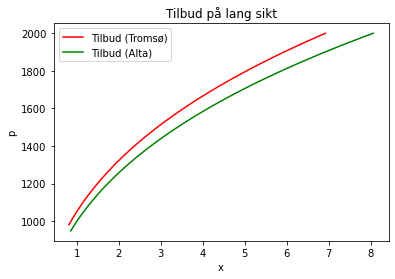

In [71]:
# plotte tilbud i Tromsø og i Alta
import numpy as np
from matplotlib import pyplot as plt

p_TOS=np.linspace(min_p_TOS,2000,100)
p_ALTA=np.linspace(min_p_ALTA,2000,100)

fig,ax=plt.subplots()
 
ax.set_ylabel('p')
ax.set_xlabel('x')
ax.plot(tilbud(p_TOS,500,380), p_TOS, label='Tilbud (Tromsø)', color='red')
ax.plot(tilbud(p_ALTA,500,352.18), p_ALTA,label='Tilbud (Alta)', color='green')


            

ax.legend(loc='upper left')
ax.set_title('Tilbud på lang sikt')

plt.show()




Dersom prisen er under p=948.45 kan ikke bedriften produsere på lønnsomt vis i noen av byene. Dersom prisen er 981.04>p>948.45 er lønnsom produksjon mulig i Alta, men ikke Tromsø. Når prisen ligger over 981.04 kan bedriften produsere i Tromsø eller Alta. Tilbudet blir alltid høyere i Alta pga lavere kostnad på arbeidskraft. Er profitten høyere i Alta?

In [73]:
solve(profitt(N_LR_ALTA, K_LR_ALTA, 352.18, 500, 200, p)-profitt(N_LR_TOS, K_LR_TOS, 380, 500, 200, p))

[750.000000000002]

Dersom prisen er høyere enn 750 vil det være mer lønnsomt å produsere i Alta (og prisen må være høyere enn 750 for lønnsom produksjon uansett!).